In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files and concatenate them
df1 = pd.read_csv("Q_67_previous-1950-2023_RR-T-Vent.csv", sep=";")
df2 = pd.read_csv("Q_67_latest-2024-2025_RR-T-Vent.csv", sep=";")
df = pd.concat([df1, df2], ignore_index=True)

In [55]:
# Only keep relevant columns
df = df[["NOM_USUEL", "TX", "AAAAMMJJ"]]
# Convert to datetime and add columns for year and month
df["AAAAMMJJ"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
df["ANNEE"] = df["AAAAMMJJ"].dt.year
df["MOIS"] = df["AAAAMMJJ"].dt.month
df.head()

,NOM_USUEL,TX,AAAAMMJJ,ANNEE,MOIS
0,ALTECKENDORF,NaN,1955-10-01,1955,10
1,ALTECKENDORF,NaN,1955-10-02,1955,10
2,ALTECKENDORF,NaN,1955-10-03,1955,10
3,ALTECKENDORF,NaN,1955-10-04,1955,10
4,ALTECKENDORF,NaN,1955-10-05,1955,10


In [56]:
# Print all USUAL_NAME values alphabetically
unique_names = df["NOM_USUEL"].unique()
unique_names.sort()
print(unique_names)

['ALTECKENDORF' 'BARR' 'BELMONT' 'BERG' 'BRUMATH' 'COL DU DONON'
 'COSSWILLER' 'COSSWILLER BISC' 'DAMBACH' 'DAMBACH_SAPC' 'DIEBOLSHEIM'
 'DIEMERINGEN' 'EBERSHEIM' 'EPFIG' 'ERCKARTSWILLER_SAPC' 'ERGERSHEIM'
 'ERSTEIN' 'ERSTEIN SA' 'ESCHAU-BOURG' 'GAMBSHEIM'
 'GRANDFONTAINE - HAUT DONON' 'GRANDFONTAINE - MF' 'GRANDFONTAINE_SAPC'
 'HAGUENAU' 'HAGUENAU - MF STIEFELHARDT' 'HAGUENAU - VILLE' 'HANGENBIETEN'
 'HEGENEY' 'HEGENEY SA' 'HEILIGENSTEIN - TRUTTENHAUSEN' 'HT-KOENIGSBOURG'
 'LA WANTZENAU' 'LA WANTZENAU SA' 'LAUTERBOURG' 'LAUTERBOURG SA'
 'LE HOHWALD' 'LE HOHWALD_SAPC' 'LEMBACH' 'LIPSHEIM' 'LOBSANN' 'LOHR'
 'MARCKOLSHEIM' 'MITTELHAUSBERGEN' 'MITTELHAUSEN' 'MONT SAINTE-ODILE'
 'MUNDOLSHEIM' 'NEUVE EGLISE' 'OSTHOFFEN' 'OTTROTT' 'PETITE PIERRE'
 'PFETTISHEIM REK' 'PLOBSHEIM' 'PREUSCHDORF' 'PREUSCHDORF - MAIRIE'
 'REICHSHOFFEN' 'ROTHAU - LA CLAQUETTE' 'ROTHAU SA' 'RUSS' 'SAALES'
 'SARREWERDEN' 'SAVERNE' 'SCHEIBENHARD' 'SCHWINDRATZHEIM' 'SELESTAT'
 'SELESTAT SA' 'SELESTAT SAD' 'SELTZ' 'SOULT

In [57]:
# Filter by station name STRASBOURG-ENTZHEIM, STRASBOURG - BOTANIQUE amd STRASBOURG - ZIEGELAU
df = df[df["NOM_USUEL"].str.contains("STRASBOURG", case=False)]
df.head()

,NOM_USUEL,TX,AAAAMMJJ,ANNEE,MOIS
171591,STRASBOURG-ENTZHEIM,0.6,1950-01-01,1950,1
171592,STRASBOURG-ENTZHEIM,2.8,1950-01-02,1950,1
171593,STRASBOURG-ENTZHEIM,3.0,1950-01-03,1950,1
171594,STRASBOURG-ENTZHEIM,6.9,1950-01-04,1950,1
171595,STRASBOURG-ENTZHEIM,8.2,1950-01-05,1950,1


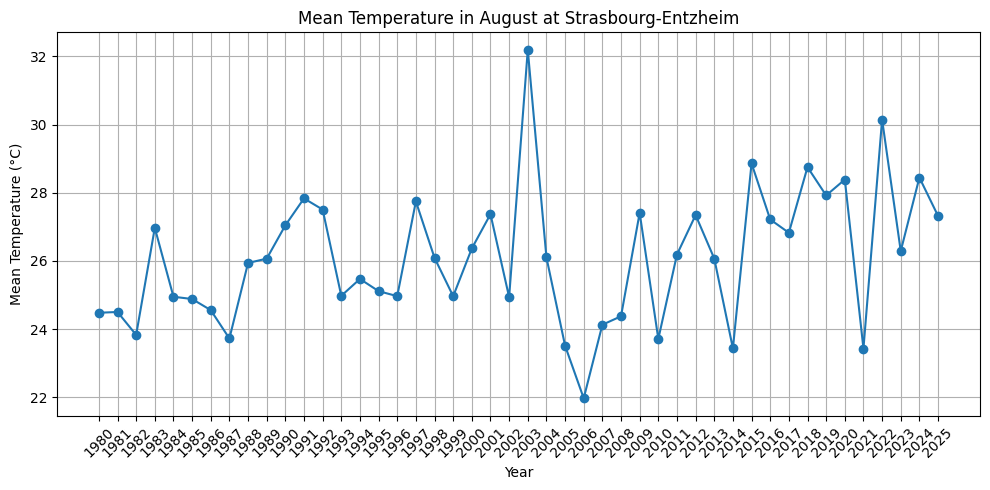

In [58]:
# Only keep data for the month of August for every year
df_august = df[df["MOIS"] == 8]
# Only keep data from 1980 onwards
df_august = df_august[df_august["ANNEE"] >= 1980]
# Group by year and calculate the mean TX
df_august = df_august.groupby("ANNEE")["TX"].mean().reset_index()

# Draw a graph of the mean TX over the years
plt.figure(figsize=(10, 5))
plt.plot(df_august["ANNEE"], df_august["TX"], marker='o')
plt.title("Mean Temperature in August at Strasbourg-Entzheim")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.grid()
plt.xticks(df_august["ANNEE"], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Group by day and keep only the maximum and minim temperature for each day
df_daily = df.groupby(["AAAAMMJJ"])["TX"]
df_daily_max = df_daily.max().reset_index()
df_daily_min = df_daily.min().reset_index()

In [60]:
# Filter for hot temperatures above 38°C
max_temp = input("Enter the maximum temperature threshold (°C): ")
df_hot_temps = df_daily_max[df_daily_max["TX"] >= float(max_temp)]
df_hot_temps = df_hot_temps.sort_values(by=["AAAAMMJJ"], ascending=True)
print(f"{df_hot_temps["TX"].count()} days with temperatures above " + max_temp + "°C")
pd.set_option('display.max_rows', None)
df_hot_temps

5 days with temperatures above 39°C


,AAAAMMJJ,TX
19577,2003-08-08,39.1
19581,2003-08-12,39.3
19582,2003-08-13,39.5
23925,2015-07-04,39.1
23926,2015-07-05,39.2
